# Quality assessment of ice sheet velocity data from satellite observations: temporal and spatial variability of velocity-related uncertainties for glaciological applications

- Data stream: satellite (observations)
- Quality area: accuracy and precision (uncertainty)
- Application area: glaciological, climatological and/or hydrlogical applications, monitoring and models

Production date: 17-07-2024

Produced by: Yoni Verhaegen and Philippe Huybrechts (Vrije Universiteit Brussel)

## 🌍 Use case: Using ice sheet surface flow velocities for the validation of a simulation with an ice sheet model for Greenland. 

## ❓ Quality assessment question
* **"How does the uncertainty of the horizontal ice sheet surface flow velocity vary in space and time and is the dataset sufficiently accurate and precise to be used in an ice sheet modeling framework?"**

The ice of ice sheets is not static, but instead flows. The primary cause of this dynamical process is the internal deformation of ice in response to gravity. As a consequence, stresses cause the ice to flow downslope under its own weight. The total velocity magnitude is the sum of the velocity related to internal ice deformation, and is complemented by basal sliding and bed deformation components. Mapping the Greenland Ice Sheet (GrIS) surface flow velocity and its temporal changes provides key information for investigating the dynamic response of the ice sheet to climate change. Remote sensing techniques, such as the use of satellites, are an important feature to derive and study these surface flow velocities of the ice sheets. These devices are able to inspect directly and repeatedly large areas of ice, and, as such are able to detect the movement of its surface. Remote sensing techniques that use satellite data are therefore considered the only feasible manner to derive accurate surface velocities of the ice sheets on a regular basis. To derive the surface flow velocities of the data that are on the Climate Data Store (CDS), Synthetic Aperture Radar (SAR) offset tracking methods have been used. The main principle relies on the preservation of surface features or other detectable patterns in between multiple image acquisition periods. The extraction of these features/patterns from images acquired over different time periods (i.e. image pairs) is used to detect their displacements, and with further processing this information can be used to derive velocity fields (Nagler et al., 2015). The velocity data can, for example, be used to calculate solid ice discharge, i.e. the ice flux across the grounding line, which is an important component of the mass balance of the grounded ice sheet. The used data acquisition techniques, however, also have their limitations (e.g. Paul et al., 2017; Lüttig et al., 2017), of which the user should take note before using the product. This notebook investigates how well the dataset on the CDS (here we use version 1.3 and 1.4) can be used in the context of an ice sheet modelling framework for Greenland. More specifically, the notebook evaluates whether the dataset is of sufficient maturity and quality for that purpose in terms of its spatio-temporal precision and accuracy. 

## 📢 Quality assessment statement

- Ice velocity (“displacement”) detection by satellites is a useful tool to grasp the overall patterns of flow dynamics of the ice sheets. When using the flow velocity data for the Greenland Ice Sheet (GrIS), users should, however, be aware of the problem areas for SAR-based remote sensing-derived velocity products. Data quality in terms of error and uncertainty can be assessed by two variables: the standard deviation (as a precision error estimate) and the valid pixel count maps (as the total number of valid measurements used in the annually averaged velocity estimate over 1 year of data acquisition). Consulting the accompanying standard deviation and the valid measurement count maps is therefore recommended to assess the error and uncertainty characterization of the product. Accuracy errors are not included in the pixel-by-pixel error estimates, but performed validation studies indicate a good agreement with other independent external data.
- Areas that typically pose challenges for SAR-derived velocity estimates include the ice sheet margins (which is the zone with the highest velocities and greatest uncertainties, and is also the most difficult area to model) and interior low-velocity zones. In these regions, there are generally lower valid measurement counts and/or higher standard deviation values, indicating lower data quality. The data quality around the ice sheet margins is affected by complex terrain and rapidly changing surface conditions, such as high surface melting and fast-flowing glaciers. In contrast, the interior zones often lack distinct surface features/patterns which are crucial for offset tracking and hence likewise hinders efficient data retrieval. These low-flow zones also experience ‘striping’, which are artefacts that can bias the data. However, it must be said that almost 85% of the data meet the ultimate goal in terms of the magnitude of the precision error proposed by the GCOS (GCOS, 2022). However, scaling the errors relative to the magnitude of the velocity estimates themselves (relative errors) would provide a clearer and more concise representation of the error pattern. The ice velocity product also complies with the threshold requirements for the temporal resolution (data are annually averaged velocities) as well as for the spatial resolution (250 m for versions 1.3 and 1.4). 
- In the light of the specific use case and question, it can be stated that the GrIS surface ice flow velocity dataset provides valuable data for the validation of ice sheet models in terms of its spatial and temporal coverage/resolution (i.e. data completeness) and uncertainty (precision errors). However, careful consideration of the data quality (i.e. the spatial and temporal variability of the precision error and valid measurement counts) can still be useful. By prioritizing the use of high-quality data (i.e. pixels with a low standard deviation and a high valid measurement count) when employing validation techniques against simulated ice sheet model output, as well as by mitigating the impact of arteficial striping, the dataset can significantly enhance the validation and hence reliability of ice sheet simulations and model output for Greenland.
- Other potential limitations and sources of error to take into account for similar climatological, hydrological or glaciological applications are the fact that there is no information available related to the time of the year during which valid measurements were acquired, that spatially filled up pixels are not flagged or detectable, that a mask is not available to get rid of non ice-covered grid cells that contain non-NaN velocity values, and lastly, that the temporal extent of the data is limited and only comprises a few years, which limits the analysis of realible means, variability and trends of the surface velocities and/or derived parameters such as solid ice discharge. To mitigate the included noise over ice-free pixels, users could carefully select a threshold velocity to accurately separate ice-covered areas from bare ground, or apply a custom ice mask from external data which helps to exclude non-ice-covered cells. To mitigate the short temporal extent, users can integrate additional external datasets with longer time spans, which can further enhance the data robustness if desired.

## 📋 Methodology

### Short description

The 'Greenland Ice Sheet (GrIS) annual gridded velocity data from 2017 to present derived from satellite observations' dataset, available on the Climate Data Store (CDS), offers annually averaged ice flow velocities and their easting and northing components for the GrIS. This data is provided on a spatial resolution grid of either 250 m or 500 m, depending on the dataset version. The dataset includes horizontal velocity components in the east and north directions, as well as the total horizontal velocity magnitude and its error, all presented on a regular grid. Surface flow velocities are treated as “displacements,” normalized to true meters per day, and are available for each glaciological year since 2017-2018. The horizontal velocities and their components are derived using offset tracking techniques with Sentinel-1 synthetic aperture radar (SAR) satellite data. The vertical velocity component that is present in the dataset is calculated indirectly from the difference in surface elevation between the start and end positions of the displacement vector, derived from a Digital Elevation Model (DEM). Hence, it does not represent the net upward or downward movement of the ice at that pixel. The data are provided in NetCDF format as gridded data fields in Polar Stereographic projection, covering the entire GrIS domain, including peripheral glaciers and ice caps. Version 1.4 includes a dynamic ice/ocean masking for outlet glaciers based on updated calving fronts, while earlier versions (version 1.3 and lower) exhibited a fixed ice-ocean mask.

### Structure and (sub)sections

In this notebook, the applicability of GrIS surface ice flow velocity data to be used as input data for the validation of ice sheet model output will be assessed. We will therefore check whether the data are of sufficient adequacy in terms of its uncertainty (accuracy and precision) for this purpose. This will be realized by analyzing the spatial and temporal characteristics of the supplemented errors of the velocity data, by inspecting a special phenomenom called 'striping', by discussing other potential limitations and error sources of the dataset, and by evaluating the implications for the usage of the data in terms of the specific use case and question (i.e. using ice sheet flow velocities in the context of an ice sheet modelleing framework for Greenland). The structure is as follows:

- **Data preparation and processing**: this section loads packages, defines requests for download from the CDS, downloads the actual data and inspects the data to reveal its structure. Also the functions that are used in this notebook are defined in this section.
- **Ice sheet flow velocities and their uncertainty estimates in space and time**: this section further analyses the uncertainty term of the horizontal ice sheet flow velocity product and assesses its characteristics in both space and time. The uncertainty is also compared to proposed thresholds by the GCOS Implementation Plan report (GCOS, 2022). This assessment will help us understand the reliability and robustness of the velocity estimates across different regions and time periods.
- **Zooming in onto the interior of the ice sheet to inspect 'striping'**: in this section, we will further inspect the phenomenom of 'striping', i.e. the presence of arteficial artefacts and a noisy appearance of the data in low-flow zones. This inspection will help us identify areas where striping might lead to misinterpretations and assess the need for corrective measures or additional data processing steps.
- **Checking the vertical velocity component of the velocity data**: this section briefly discusses the vertical velocity component that is available from the dataset. Maps will be plotted showing the spatial distribution of the vertical velocities. Guidance for interpretation of the data is also given.
- **Implications for the use of horizontal ice flow velocity data in an ice sheet modelling framework**: the final section uses all information derived above to assess the suitability of the ice sheet surface ice flow velocity dataset (with respect to the spatial/temporal characteristics of the error and the presence of 'striping') to use the velocity product in the context of an ice sheet modelleing framework for Greenland. 

## 📈 Analysis and results

### ⏬ Data preparation and processing

First we load the packages:

In [1]:
import matplotlib.colors
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import xarray as xr
import math
from c3s_eqc_automatic_quality_control import download
import os
os.environ["CDSAPI_RC"] = os.path.expanduser("~/verhaegen_yoni/.cdsapirc")

plt.style.use("seaborn-v0_8-notebook")

Then we define requests for download from the CDS and download the GrIS velocity data.

🚨 **The files can be large! Since the data files to be downloaded are of considerable size due to the high spatial resolution, this may take a couple of minutes.**

In [2]:
period_start = "2017_2018"
period_stop = "2020_2021"
assert all("_" in period and len(period) == 9 for period in (period_start, period_stop))

y0_start, y1_start = map(int, period_start.split("_"))
y0_stop, y1_stop = map(int, period_stop.split("_"))
collection_id = "satellite-greenland-ice-sheet-velocity"
request = {
    "variable": "all",
    "format": "zip",
    "version": ["1.3","1.4"],
    "period": [
        f"{y0}_{y1}"
        for y0, y1 in zip(range(y0_start, y0_stop + 1), range(y1_start, y1_stop + 1))
    ],
}

print("Downloading ice sheet velocity data, this may take a couple of minutes...")

ds = download.download_and_transform(
    collection_id,
    request,
)

# Get the chunk sizes
chunk_sizes = {}
for var_name, da in ds.data_vars.items():
    if var_name == "crs":
        continue  # Skip the variable named "crs"
    chunks = []
    if da.chunks is not None:  # Check if da.chunks is not None
        for dim_chunks in da.chunks:
            if isinstance(dim_chunks, tuple):
                dim_chunks = tuple(filter(lambda x: isinstance(x, int), dim_chunks))
                chunks.append(dim_chunks)
    chunk_sizes[var_name] = tuple(chunks)
extracted_sizes = set()
for var_name, sizes in chunk_sizes.items():
    for size_tuple in sizes:
        extracted_sizes.update(size_tuple)
ds = ds.chunk(y=list(extracted_sizes)[3], x=list(extracted_sizes)[2])

print("Downloading completed.")

100%|██████████| 1/1 [00:26<00:00, 26.70s/it]


We can read and inspect the data. Let us print out the data to inspect its structure:

In [3]:
ds

<xarray.Dataset> Size: 8GB
Dimensions:                              (source: 4, y: 10801, x: 5984)
Coordinates:
  * source                               (source) object 32B 'C3S_GrIS_IV_250...
  * y                                    (y) float64 86kB -6.556e+05 ... -3.3...
  * x                                    (x) float64 48kB -6.399e+05 ... 8.55...
Data variables:
    crs                                  (source) int32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    land_ice_surface_easting_velocity    (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_northing_velocity   (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_vertical_velocity   (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_velocity_magnitude  (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_measurement_count   (source, y, x) float64 2GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_easting_stddev      (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
    land_ice_surface_northing_stddev     (source, y, x) float32 1GB dask.array<chunksize=(1, 1351, 748), meta=np.ndarray>
Attributes: (12/13)
    comment:        Ice velocity map of Greenland derived from Sentinel-1 SAR...
    contact:        www.c3s.com
    Conventions:    CF-1.7
    creation_date:  2021-01-27
    history:        Initial product version 1.3
    institution:    Copernicus Climate Change Service
    ...             ...
    license:        C3S general license
    project:        C3S_312b_Lot4_ice_sheets_and_shelves
    reference:      Main: Nagler, T.; Rott, H.; Hetzenecker, M.; Wuite, J.; P...
    source:         Copernicus Sentinel-1A and Sentinel-1B
    summary:        Ice velocity derived for Greenland Ice Sheet gridded at 2...
    title:          Ice Velocity of the Greenland Ice Sheet

The versions 1.3 and 1.4 are a gridded dataset at a 250 m spatial resolution containing annually averaged values of the ice sheet horizontal surface flow velocity $V$ (in m/day) of a grid cell (`land_ice_surface_velocity_magnitude`) and its components (`land_ice_surface_easting_velocity` ($V_x$) and `land_ice_surface_northing_velocity` ($V_y$)) since the 2017-2018 hydrological year. The uncertainties (reported as precision errors or standard deviations) of the horizontal components are also given as `land_ice_surface_easting_stddev` ($\sigma_{V_x}$) and `land_ice_surface_northing_stddev` ($\sigma_{V_y}$). Also the vertical component is given as `land_ice_surface_vertical_velocity` ($V_z$), but without a corresponding uncertainty. Additionally, also a variable named `land_ice_surface_measurement_count` is present, which provides the total number of valid measurements used in the annually averaged velocity estimate for a certain pixel. 

For clarification, the total horizontal velocity magnitude $V$ and its uncertainty $\sigma_{V}$ are calculated from its components as follows:

$
V
$
[m day⁻¹] 
$
= \sqrt {V_x^2 + V_y^2}
$

$
\sigma_{V}
$
[m day⁻¹] 
$
= \sqrt {(\sigma_{V_x})^2 + (\sigma_{V_y})^2}
$

where $V_x$ and $V_y$ are respectively the easting and northing components of the horizontal velocity vector. Let us calculate and add the total standard deviation to the data so we can work with it easily later on in the notebook. We also perform some slight data manipulations to the data array to improve data handling:

In [4]:
def compute_std_and_reform(ds):
    name = "land_ice_surface_velocity_magnitude"
    ds = ds.chunk(y=list(extracted_sizes)[3], x=list(extracted_sizes)[2])

    # Add std
    std = (
        ds["land_ice_surface_easting_stddev"] ** 2
        + ds["land_ice_surface_northing_stddev"] ** 2
    ) ** (1 / 2)
    std.attrs = {
        "long_name": "Velocity standard deviation",
        "units": ds[name].attrs["units"],
    }
    ds["land_ice_surface_stddev"] = std
    
    # Preserve chunksizes
    ds = ds[
        [
            "land_ice_surface_velocity_magnitude",
            "land_ice_surface_measurement_count",
            "land_ice_surface_stddev",
            "land_ice_surface_vertical_velocity",
        ]
    ]
    for da in ds.data_vars.values():
        da.encoding["chunksizes"] = tuple(map(max, da.chunks))
    return ds

ds = compute_std_and_reform(ds)

# Rename source dim
periods = []
for source in ds["source"].values.tolist():
    start, stop = source.split("_")[5:7]
    periods.append(f"{start[:4]}-{stop[:4]}")
ds["source"] = periods
ds = ds.rename(source="period")

# Add attributes
for name, da in ds.data_vars.items():
    if name == "land_ice_surface_measurement_count":
        da.attrs["units"] = "image pairs"
        da.attrs["long_name"] = "Count of valid measurements"
    if "long_name" not in da.attrs:
        da.attrs["long_name"] = da.attrs.get("description", name.replace("_", " "))

Now, our dataset array only holds the most important information: the total horizontal velocity magnitude (`land_ice_surface_velocity_magnitude`), the vertical velocity component (`land_ice_surface_vertical_velocity`), the valid pixel count (`land_ice_surface_measurement_count`), and our calculated standard deviation (`land_ice_surface_stddev`) from the northing and easting components. Let us begin with the analysis.

### 📉 Ice sheet flow velocities and their uncertainty estimates in space and time

We begin by plotting the ice flow velocities for each hydrological year between the beginning and end period that we selected for the velocity data with a defined plotting function.

🚨 **The files can be large! Since the data files to be plotted are of considerable size, this may take a couple of minutes.**

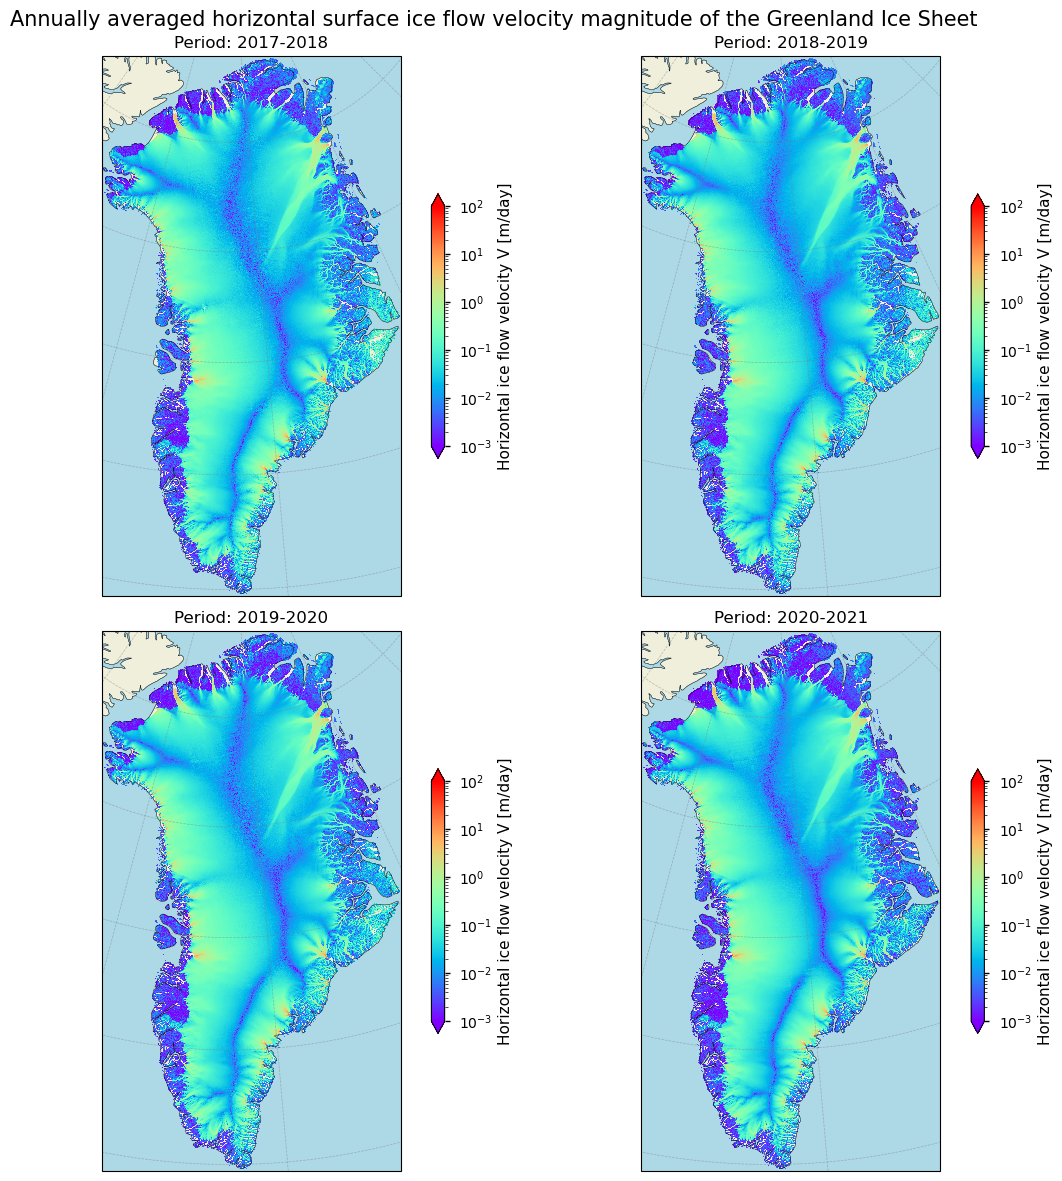

In [5]:
def plot_maps(da, suptitle=None, **kwargs):
    kwargs.setdefault("cmap", "rainbow")

    # Plot each period on a different subplot
    if 'period' in da.coords:
        periods = da.coords['period'].values
        num_periods = len(periods)
        num_cols = 2
        num_rows = math.ceil(num_periods / num_cols)
    else:
        periods = 1
        num_periods = 1
        num_cols = 1
        num_rows = 1

    # Create subplots with Polar Stereographic projection
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)}) # Check in metadata for info of projection
    axs = axs.flatten()  # Flatten the array of axes for easy iteration
    if suptitle:
        fig.suptitle(suptitle,fontsize=15)

    for i, (ax, period) in enumerate(zip(axs, periods)):
        if period is not None:
            subset_da = da.sel(period=period)
        else:
            subset_da = da
    
        # Plot the data 
        im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
        # Set extent and plot features
        ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.OCEAN, color='lightblue')
        ax.coastlines()
        ax.gridlines(draw_labels=False,linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
        ax.set_title(f'Period: {period}' if period is not None else 'Full Data')
        fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")

    fig.tight_layout()  
    plt.show()

# Apply the function to the velocity data
da = ds["land_ice_surface_velocity_magnitude"]
da.attrs = {
    "long_name": "Horizontal ice flow velocity V",
    "units": "m/day",
}
_ = plot_maps(
    da,
    norm=matplotlib.colors.LogNorm(),
    vmin=1e-3,
    vmax=1e2,
    suptitle="Annually averaged horizontal surface ice flow velocity magnitude of the Greenland Ice Sheet",
)

The corresponding data are annually averaged values, and are hence derived from all-year round observations during the glaciological balance year (1 October to 30 September). The annually averaged nature of the data meets the minimum requirement for GCOS (Global Climate Observing System) (GCOS, 2022), but also limits the potential usage in research if e.g. seasonal data are desired. The dataset shows almost no temporal or spatial (as most have been filled up) data gaps and is presented as gridded values at a spatial resolution of 250 meter (for versions 1.3 and 1.4 as used here). Spatially filled gaps are not flagged and hence not detectable. The spatial coverage of the data thus approximates 100% and encompasses the entire ice sheet, including peripheral glaciers and ice caps. The horizontal velocity data show the interior low-flow zones and the increased velocities near the ice sheet’s margins and its outlet glaciers, which is in line with other GrIS velocity maps in the literature (e.g. Howat et al., 2022). However, an ice mask is not included and it is thus not possible to exclude non ice-covered pixels from the data. Pixels over ice-free terrain hold non-NaN data and have not been removed, implying that the data exhibits false low velocity measurements and noise over ice-free terrain.

Let us now consider the unceratinty of the dataset. The total error of an annual ice flow velocity estimate is theoretically given by the sum of the precision (random) and the accuracy (systematic) error:

$
\varepsilon = \sigma + \delta
$
where $\sigma$ is the random error (i.e. standard deviation) and $\delta$ the systematic error. 

In the GrIS ice flow velocity dataset, precision errors are reported as the standard deviation (i.e. the 68% confidence interval) and the accuracy error is not provided. Therefore, in our case, $\delta$ = 0. 

Quantitative pixel-by-pixel error estimates are available for the dataset. In this dataset, the uncertainty characterization is quantified by two variables: the standard deviation (i.e. a precision error from a 5x5 pixel neighbourhood) of the velocity estimate with units of m/day, and the valid pixel count (the number of non-NaN observations used in the production of each annual velocity estimate for a certain pixel, or differently stated, the amount of individual displacement estimates (i.e. image pairs) that were used to calculate the annually averaged velocity at that pixel). Let us express the valid pixel count variable with symbol $N_{VP}$. Both can then, if desired, be combined to produce the pixel-by-pixel standard error:

$
\sigma_{\overline{V}} = \dfrac{\sigma_V}{\sqrt{N_{VP}}}
$

with $\sigma_V$ the standard deviation and $N_{VP}$ the valid pixel count for a certain pixel.

We will proceed by changing the units of the error $\varepsilon$ to m yr⁻¹ because the GCOS Implementation Plan report (GCOS, 2022) advises uncertainty values to be provided in these units. We will also multiply the standard deviation by 2 because the GCOS assesses precision errors in the form of 2 standard deviations:

$
\varepsilon_{{V}}
$
[m yr⁻¹]
$
= 365.25 \cdot (2 \cdot \sigma_{{V}})
$

We can perform some statistics on the error term over all pixels and all years to inspect its distribution:

In [6]:
error_m_yr = 2*(365.25*ds["land_ice_surface_stddev"])
error_m_yr.attrs = {
    "long_name": "Horizontal ice flow velocity error",
    "units": "m/yr",
}
# Print values
for i, err in enumerate(error_m_yr):
    print(f"The arithmetic mean precision error (2σ) " 
          f"for the year {int(i)+int(period_start[:4])}-{int(i)+int(period_start[5:])} CE "
          f"is {float(np.abs(np.nanmean(error_m_yr[i,:]))):.2f} m yr⁻¹.")

nvp_yr = ds["land_ice_surface_measurement_count"]
nvp_yr.attrs = {
    "long_name": "Count of valid measurements",
    "units": "image pairs",
}
# Print values
for i, err in enumerate(nvp_yr):
    print(f"The arithmetic mean valid measurement count " 
          f"for the year {int(i)+int(period_start[:4])}-{int(i)+int(period_start[5:])} CE "
          f"is {float(np.abs(np.nanmean(nvp_yr[i,:]))):.2f} velocity estimates per pixel.")

The arithmetic mean precision error (2σ) for the year 2017-2018 CE is 9.19 m yr⁻¹.
The arithmetic mean precision error (2σ) for the year 2018-2019 CE is 7.90 m yr⁻¹.
The arithmetic mean precision error (2σ) for the year 2019-2020 CE is 7.14 m yr⁻¹.
The arithmetic mean precision error (2σ) for the year 2020-2021 CE is 328.67 m yr⁻¹.
The arithmetic mean valid measurement count for the year 2017-2018 CE is 133.65 velocity estimates per pixel.
The arithmetic mean valid measurement count for the year 2018-2019 CE is 138.09 velocity estimates per pixel.
The arithmetic mean valid measurement count for the year 2019-2020 CE is 136.80 velocity estimates per pixel.
The arithmetic mean valid measurement count for the year 2020-2021 CE is 122.56 velocity estimates per pixel.


The threshold (i.e. the minimum requirement to be met to ensure that data are useful) for surface ice flow velocity uncertainty (expressed in terms of 2$\sigma$) proposed by the GCOS is 100 m yr⁻¹, while the "goal" value (i.e. an ideal requirement above which further improvements are not necessary) would be 10 m yr⁻¹ per grid point (GCOS, 2022). Hence, for data to still be useful, the error can be maximum 100 m yr⁻¹. The overall arithmetic mean error over both space and time shows that the goal (i.e. the optimal requirement) is reached for all years but the last one (see later). 

Further investigation reveals that the errors exhibit a relationship with the absolute magnitude of the horizontal flow velocity (a positive relationship) and the valid pixel count (a slight negative relationship) in the corresponding pixels:

🚨 **The files can be large! Since the data files to be plotted are of considerable size, this may take a couple of minutes.**

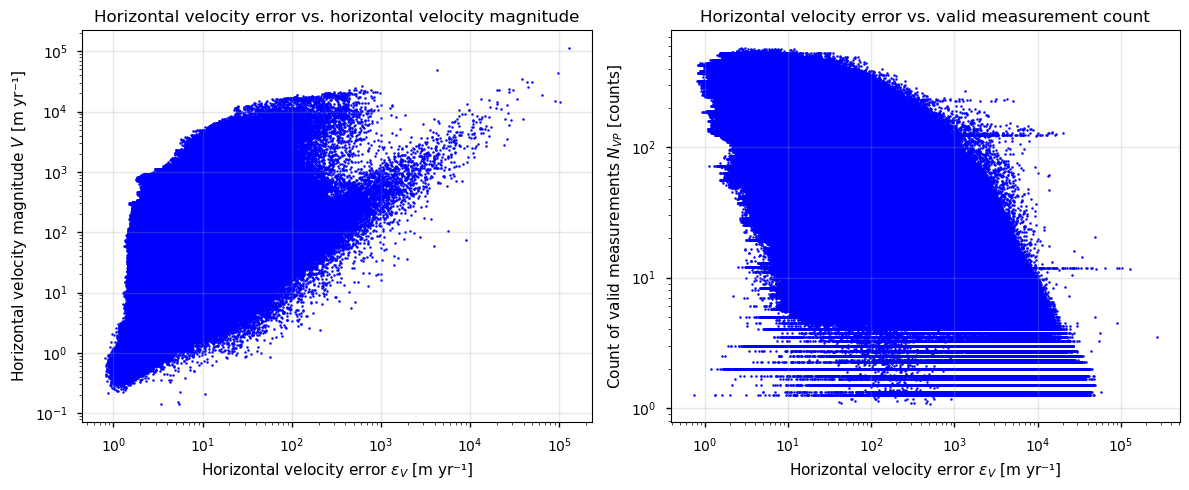

In [10]:
# Get necessary data
ds_to_plot = ds.mean(dim=['period'], keep_attrs=True)
ds_to_plot = ds_to_plot.coarsen(x=2, y=2, boundary='trim').mean()
stddev_name = "land_ice_surface_stddev"
velocity_name = "land_ice_surface_velocity_magnitude"
count_name = "land_ice_surface_measurement_count"
ds_to_plot = ds_to_plot.stack(xy=("x", "y"))
mask_velocity = ds_to_plot[velocity_name].notnull()
mask_count = ds_to_plot[count_name].notnull()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: land_ice_surface_stddev vs. land_ice_surface_velocity_magnitude
axes[0].scatter(
    2*365.25*ds_to_plot[stddev_name],
    2*365.25*ds_to_plot[velocity_name],
    color='blue',
    s=2
)
axes[0].set_xlabel('Horizontal velocity error $\epsilon_{{V}}$ [m yr⁻¹]')
axes[0].set_ylabel('Horizontal velocity magnitude $V$ [m yr⁻¹]')
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].grid(color='#95a5a6', linestyle='-', alpha=0.25)
axes[0].set_title("Horizontal velocity error vs. horizontal velocity magnitude")

# Scatter plot: land_ice_surface_stddev vs. land_ice_surface_measurement_count
axes[1].scatter(
    2*365.25*ds_to_plot[stddev_name],
    ds_to_plot[count_name],
    color='blue',
    s=2
)
axes[1].set_xlabel('Horizontal velocity error $\epsilon_{{V}}$ [m yr⁻¹]')
axes[1].set_ylabel('Count of valid measurements $N_{VP}$ [counts]')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].grid(color='#95a5a6', linestyle='-', alpha=0.25)
axes[1].set_title("Horizontal velocity error vs. valid measurement count")

plt.tight_layout()
plt.show()


Before discussing the pattern, let us first plot the spatial distribution of the errors (here again visualized as 2 times the standard deviation with units in meters per year):

🚨 **The files can be large! Since the data files to be plotted are of considerable size, this may therefore take a couple of minutes.**

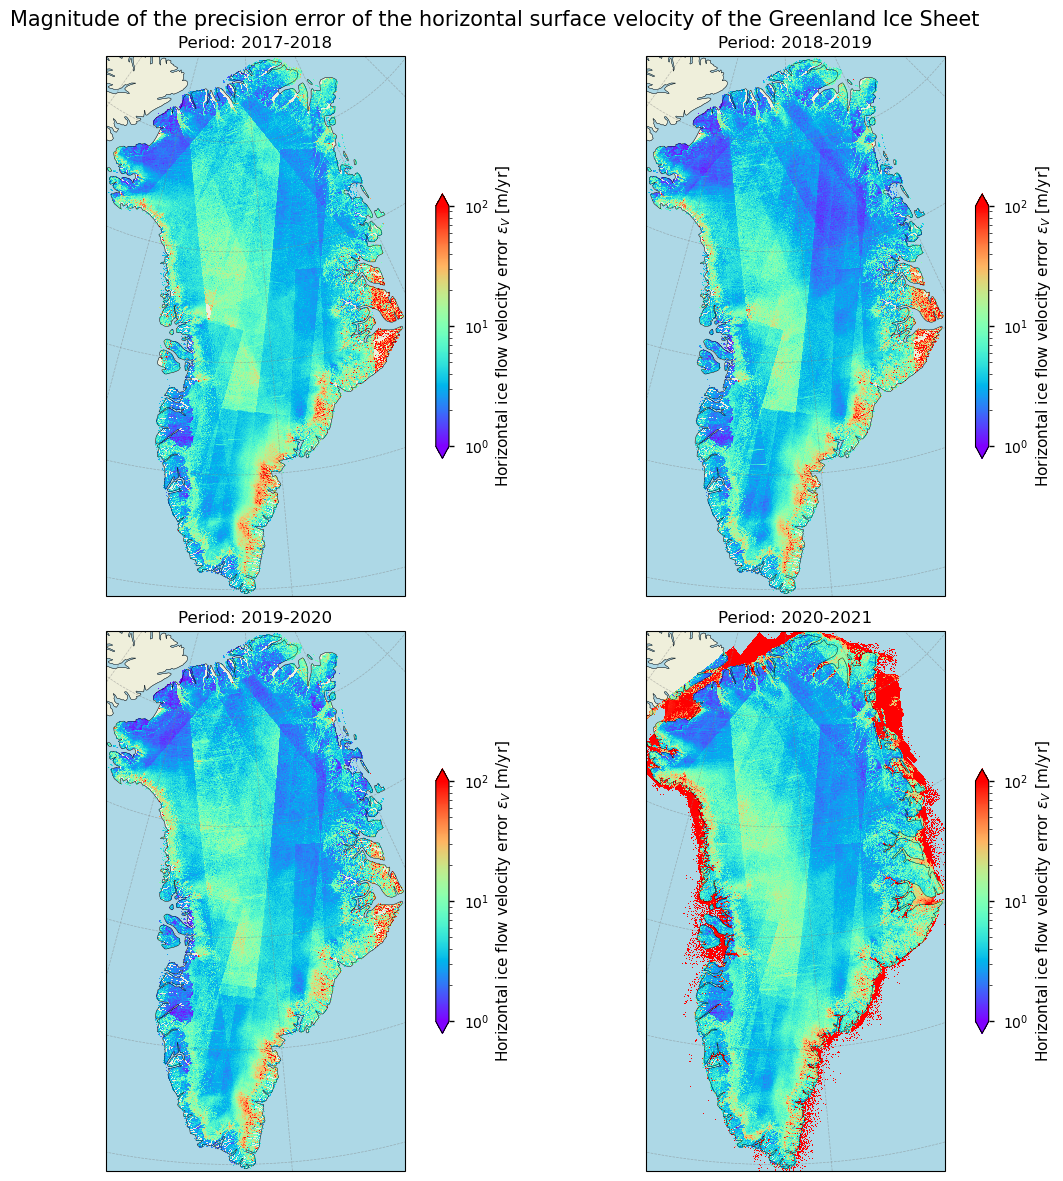

In [7]:
# Apply the function to the velocity error data
da = error_m_yr
da.attrs = {
    "long_name": r"Horizontal ice flow velocity error $\epsilon_{{V}}$",
    "units": "m/yr",
}
_ = plot_maps(
    da,
    norm=matplotlib.colors.LogNorm(),
    vmin=1,
    vmax=1e2,
    suptitle="Magnitude of the precision error of the horizontal surface velocity of the Greenland Ice Sheet",
)

Here, high standard deviation areas suggest lower precision and higher uncertainty, whereas low standard deviation areas indicate more reliable measurements. From the images above, it can immediately be seen why the horizontal velocity error for the 2020-2021 period is relatively high when compared to the earlier years: the data have not been masked. High errors prevail over the ocean, which is of course unrealistic, and data even extend further into the Canadian Arctic. We can solve this by masking the data (i.e. by excluding the data outside of the Greenland continent land borders) and recalculating the error:

In [8]:
std_2020_2021 = error_m_yr.sel(period='2020-2021')
std_2020_2021 = std_2020_2021.where(~np.isnan(ds["land_ice_surface_velocity_magnitude"].sel(period='2020-2021')))
print(f"The masked arithmetic mean precision error (2σ) " 
          f"for the 2020-2021 period "
          f"is {float(np.abs(np.nanmean(std_2020_2021))):.2f} m yr⁻¹.")

The masked arithmetic mean precision error (2σ) for the 2020-2021 period is 6.51 m yr⁻¹.


From the plots, the precision errors seem to be especially high near the margins of the ice sheet. In these regions, the threshold value of 100 m yr⁻¹ is locally not reached. Let us make this plot a bit clearer by grouping the errors (here averaged over all time periods) with respect to the threshold values proposed by the GCOS:

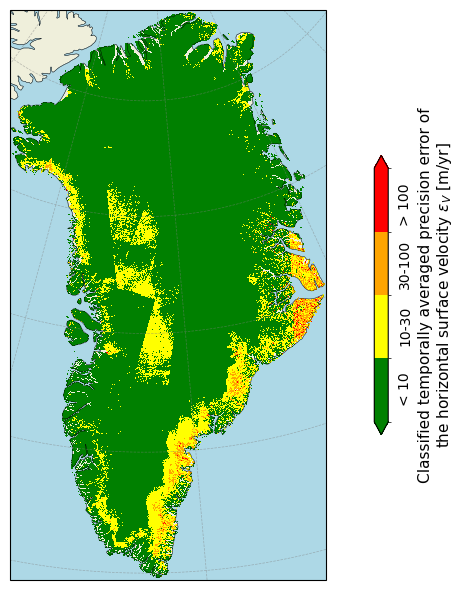

In [19]:
error_m_yr = error_m_yr.where(~np.isnan(ds["land_ice_surface_velocity_magnitude"].sel(period='2020-2021')))
error_m_yr = error_m_yr.mean(dim='period')

def plot_maps_single(da, suptitle=None, **kwargs):
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)})
    if suptitle:
        fig.suptitle(suptitle,fontsize=15)
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label="Classified temporally averaged precision error of\nthe horizontal surface velocity $\\epsilon_{V}$ [m/yr]")
    cb.set_ticks([(0 + 14) / 2, (10 + 40) / 2, (30+140)/2, (np.nanmax(da))/1.5])  # Set the ticks at the midpoints of the ranges
    cb.set_ticklabels(['< 10', '10-30', '30-100', '> 100'])  # Set the tick labels
    cb.ax.yaxis.set_tick_params(rotation=90)
    cb.ax.yaxis.set_tick_params(length=0)

    plt.tight_layout()
    plt.show()

# Apply the function to the velocity standard deviation data
da = error_m_yr
da.attrs = {
    "long_name": r"Horizontal ice flow velocity error $\epsilon_{{V}}$",
    "units": "m/yr",
}

# Define bounds and colormap
bounds = [0, 10, 30, 100, np.nanmax(da)]
cmap = matplotlib.colors.ListedColormap(['green', 'yellow', 'orange','red'])
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

_ = plot_maps_single(
    da,
    cmap=cmap,
    norm=norm,
)

When plotted, the error (in the figure above plotted as averaged over all time periods) of the ice velocity product exhibits a significant spatial variability, with higher values generally observed near the ice sheet margins. Here, the terrain complexity, rapidly changing surface conditions, as well as the relatively high speed of the outlet glaciers, have a direct impact on the quality of the source material that is used to deduce ice flow velocities and the corresponding standard deviation. 

As such, high terrain complexity and rapidly changing surface conditions (such as high ice melt or any other changes in the terrain that can alter the scattering characteristics of the radar pulse) are important factors to consider. Conversely, towards the interior of the ice sheet, where there is little or no melt and ice flow speeds are relatively low and stable, the standard deviation is relatively low as well. When comparing the image above to the absolute horizontal velocities, the link between the surface velocity magnitude and its standard deviation is illustrated. It can be seen that fast-flowing areas near the margins correspond to overall higher standard deviations (with some exceptions, such as the NEGIS), while in the stable interior low-flow zones of the ice sheet, the corresponding overall precision error is low. 

We can check in what percentage of the pixels the GCOS requirements have been reached or not reached:

In [12]:
error_spatial = error_m_yr
count_10 = (error_spatial < 10).sum().values
count_100 = (error_spatial > 100).sum().values
count_nonnan = np.sum(~np.isnan(error_spatial).values)
print(f"The percentage of data points with a velocity precision error value (2σ) less than 10 m yr⁻¹ is {(100*count_10/count_nonnan):.2f}%.")
print(f"The percentage of data points with a velocity precision error value (2σ) more than 100 m yr⁻¹ is {(100*count_100/count_nonnan):.2f}%.")

The percentage of data points with a velocity precision error value (2σ) less than 10 m yr⁻¹ is 84.84%.
The percentage of data points with a velocity precision error value (2σ) more than 100 m yr⁻¹ is 0.23%.


It must be said that these absolute errors may not be the most appropriate way to assess the data quality. For example, an error of ± 5 m/yr may be high in the interior of the ice sheet, but can be considered low when compared to velocities of > 500 m/yr for certain outlet glaciers. Rather, it would therefore make more sense to use relative errors (i.e. scaled to the surface flow velocity magnitude):

$\varepsilon_V^{rel} = \left(\dfrac{\varepsilon_V}{V}\right)$

For comparison, let us plot a map of the temporally averaged relative standard deviations:

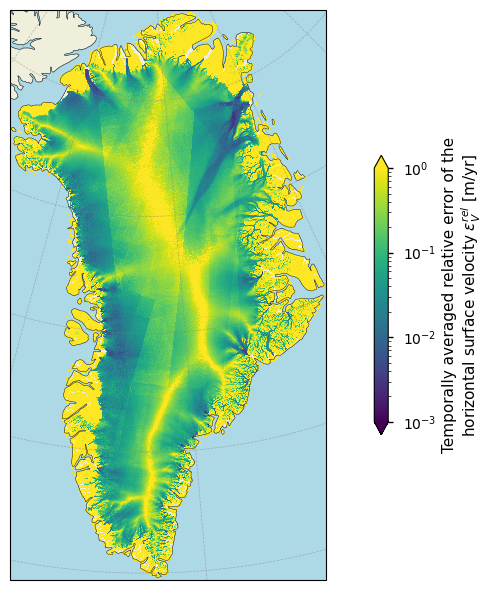

In [7]:
error_m_yr_rel = (ds["land_ice_surface_stddev"])/ds["land_ice_surface_velocity_magnitude"]
error_m_yr_rel = error_m_yr_rel.mean(dim='period')

def plot_maps_single(da, suptitle=None, **kwargs):
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)})
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    ax.set_title(None)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49,label="Temporally averaged relative error of the\nhorizontal surface velocity $\\epsilon_{V}^{rel}$ [m/yr]")
    plt.tight_layout()
    plt.show()

da = error_m_yr_rel
_ = plot_maps_single(
    da,
    norm=matplotlib.colors.LogNorm(),
    vmin=0.001,
    vmax=1,
)

Next, let us plot the valid measurement counts:

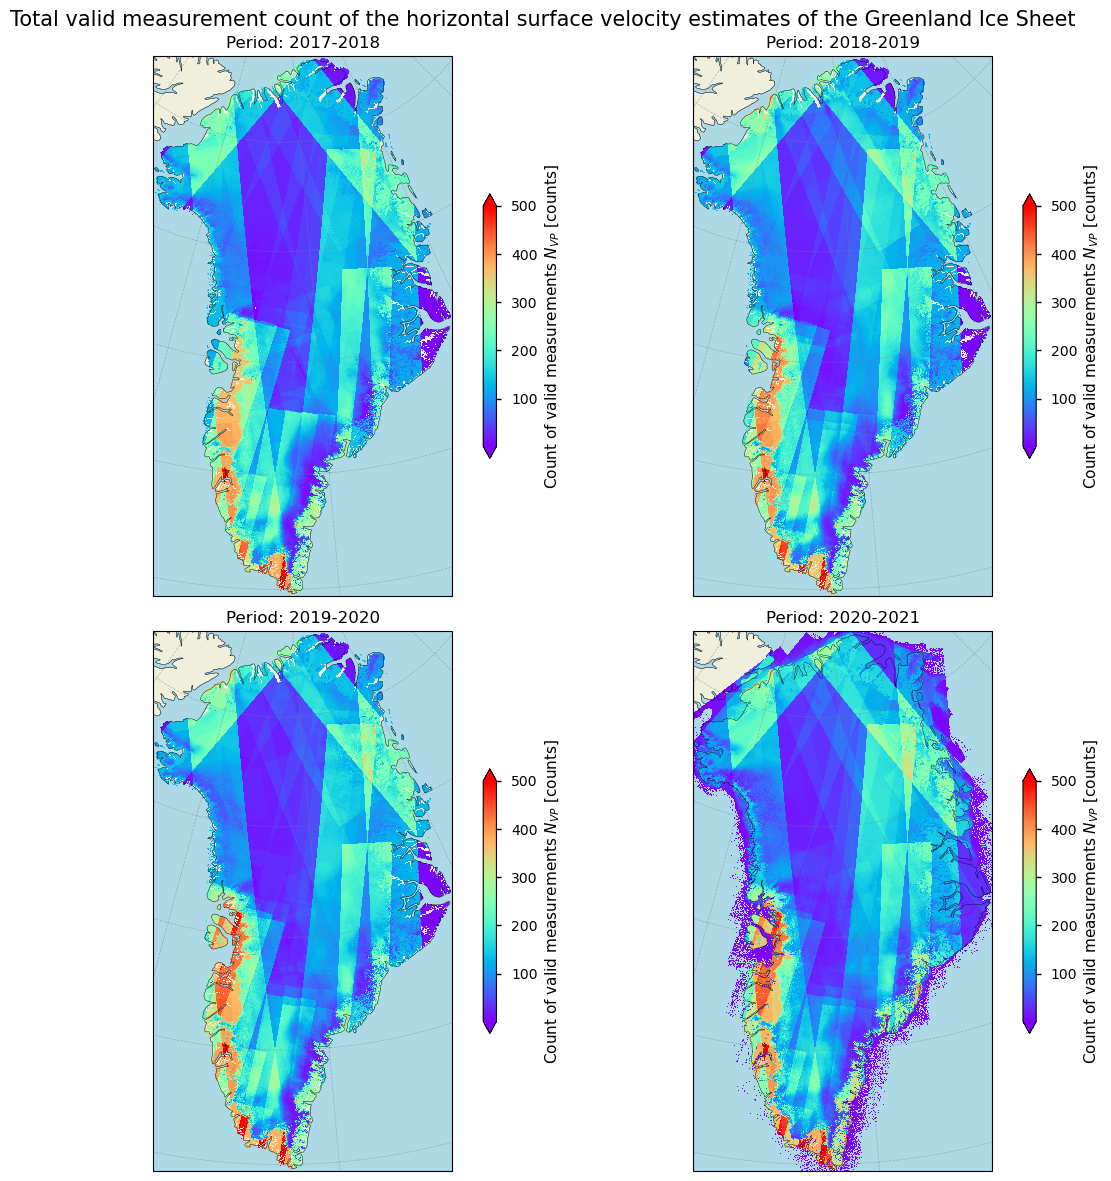

In [20]:
# Apply the function to the velocity error data
da = ds["land_ice_surface_measurement_count"]
da.attrs = {
    "long_name": r"Count of valid measurements $N_{VP}$",
    "units": "counts",
}
_ = plot_maps(
    da,
    vmin=1,
    vmax=500,
    suptitle="Total valid measurement count of the horizontal surface velocity estimates of the Greenland Ice Sheet",
)

Here, a higher count typically indicates a more reliable estimate due to the averaging of more observations. All periods show a similar pattern, with some small variations likely due to differences in data availability and surface conditions over time. Higher valid pixel counts are observed along the margins of the ice sheet and major outlet glaciers, consistent with areas of fast dynamics that require a more detailed monitoring. The valid pixel counts shown in the images, which range up to 500 image pairs, reflect a high-density observation and robust data acquisition process. This high density of observations enhances the accuracy and reliability of the velocity maps, particularly in dynamic regions like the margins and outlet glaciers of the ice sheet. Generating high-density velocity estimates using SAR is generally more challenging in the interior of the ice sheet. This difficulty arises because the interior often lacks distinct detectable surface features/patterns which are crucial for offset tracking methods. Additionally, the relatively slow movement of ice in the interior compared to the faster-flowing edges results in smaller displacements between image pairs, making it harder to detect and measure them accurately. A drawback is the fact that there is no information given related to the time of the year during which valid measurements were acquired. 

Again, we observe that the data for 2020-2021 are not masked for data outside of the Greenland continent land borders. We correct it similarly as done for the precision error:

In [14]:
nvp_2020_2021 = ds["land_ice_surface_measurement_count"].sel(period='2020-2021')
nvp_2020_2021 = nvp_2020_2021.where(~np.isnan(ds["land_ice_surface_velocity_magnitude"].sel(period='2020-2021')))
print(f"The masked arithmetic mean valid measurement count " 
          f"for the 2020-2021 period "
          f"is {float(np.abs(np.nanmean(nvp_2020_2021))):.2f} velocity estimates per pixel.")

The masked arithmetic mean valid measurement count for the 2020-2021 period is 136.30 velocity estimates per pixel.


We can also combine the values of the `land_ice_surface_measurement_count` and `land_ice_surface_stddev` variables to compute a data quality mask. For example, we can define a quality-rich pixel as one that has both a precision error < 10 m yr⁻¹ and a valid pixel count of > 100 estimates (averaged over all time periods). In the map below, pixels within the data array are colored green when this condition is met, else they are colored red:

- Higher quality: $\epsilon_{{V}} < 10 \, \text{m yr}^{-1} \ \& \ N_{VP} > 100$ pixels,
- Lower quality: $\epsilon_{{V}} \geq 10 \, \text{m yr}^{-1} \ \| \ N_{VP} \leq 100$ pixels


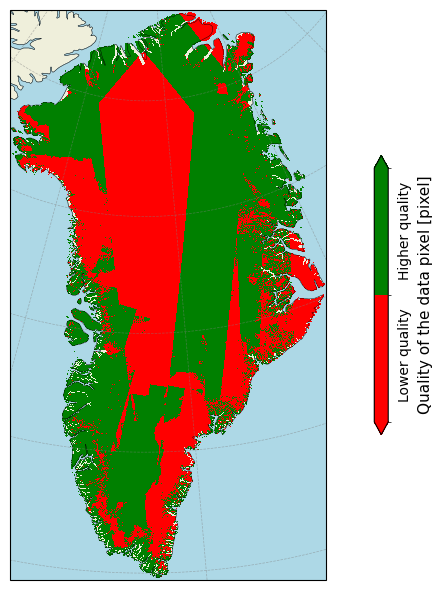

In [30]:
error_m_yr = error_m_yr
nvp_count = ds["land_ice_surface_measurement_count"].mean(dim="period")

def plot_maps_single(da, suptitle=None, **kwargs):
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)})
    
    # Plot the data 
    subset_da = da
    im = subset_da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    ax.set_title(None)
    ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Add colorbar
    cb = fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")
    cb.set_ticks([0.425, 0.925])  # Set the ticks at the midpoints of the ranges
    cb.set_ticklabels(['Lower quality', 'Higher quality'])  # Set the tick labels
    cb.ax.yaxis.set_tick_params(rotation=90)
    cb.ax.yaxis.set_tick_params(length=0)

    plt.tight_layout()
    plt.show()

# Apply the function to the velocity standard deviation data
da = xr.where((error_m_yr < 10) & (nvp_count > 100), True, False)
da = da.where(~np.isnan(ds["land_ice_surface_velocity_magnitude"].sel(period='2020-2021')))
da.attrs = {
    "long_name": r"Quality of the data pixel",
    "units": "pixel",
}

# Define bounds and colormap
bounds = [0, 0.5, 1]  # Green (0), Red (1)
cmap = matplotlib.colors.ListedColormap(['red', 'green'])
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

_ = plot_maps_single(
    da,
    cmap=cmap,
    norm=norm,
)

As mentioned before, accuracy errors are not included in the total error estimate of the dataset. To get an idea of the accuracy, the ECMWF Confluence Wiki can be consulted, where the results of a validation study are summarized. The validation process involved comparing the velocity maps with in-situ GPS data from various sites, as well as with NASA's MEaSUREs velocity product (Joughin et al., 2021). Quality assurance furthermore included an algorithm performance assessment in stable terrain (where velocities should equal 0). The validation outcome on the ECMWF Confluence Wiki overall showed good results:

- Comparisons to in-situ GPS data showed a good agreement with minimal differences (RMSE of the velocity magnitude in the order of 0.02-0.03 m day⁻¹).
- Intercomparisons with MEaSUREs data indicated an RMSE in the order of 0.02-0.04 m day⁻¹ in the interior of the ice sheet and 0.20-0.30 m day⁻¹ for outlet glaciers.
- Stable terrain tests showed an RMSE in the order of 0.01-0.02 m day⁻¹.

These results demonstrate the good agreement between the dataset and independent external data. Factors that may have interfered with the data accuracy are the characteristics of the source data and the presence of varying external factors (e.g. atmospheric conditions) during the data acquisition (which affect the "similarity" of image pairs), different algorithm applications and settings, and different post-processing and editing procedures (e.g. changing glacier surface conditions, high terrain complexity, the presence of noise and apparent offsets that are not caused by the actual displacement of the surface, satellite characteristics and configurations, procedures of outlier removal, gap filling and interpolation, etc.), which can all affect the product accuracy and quality (Paul et al., 2017).

### 📍 Zooming in onto the interior of the ice sheet to inspect 'striping'

In the context of the velocity products, "striping" (or azimuthal streaking) is a known issue in low-flow velocity zones derived from SAR-based velocity estimates (Nagler et al., 2015; Paul et al., 2017). Striping refers to the presence of artificial, regularly spaced lines and bands (aligned approximately perpendicular to the satellite flight direction) or a noisy appearance in the velocity data, which can appear as a pattern that is not related to the actual ice flow dynamics. Striping is often more noticeable in low-flow zones because the absolute velocity values are small, making any systematic errors or artefacts more apparent relative to the true signal. In regions with higher ice flow velocities, these artifacts might be less visible due to the larger magnitude of the velocity signal. Let us zoom in to the interior of the ice sheet, with an adjusted colour scale, to visualize this phenomenom:

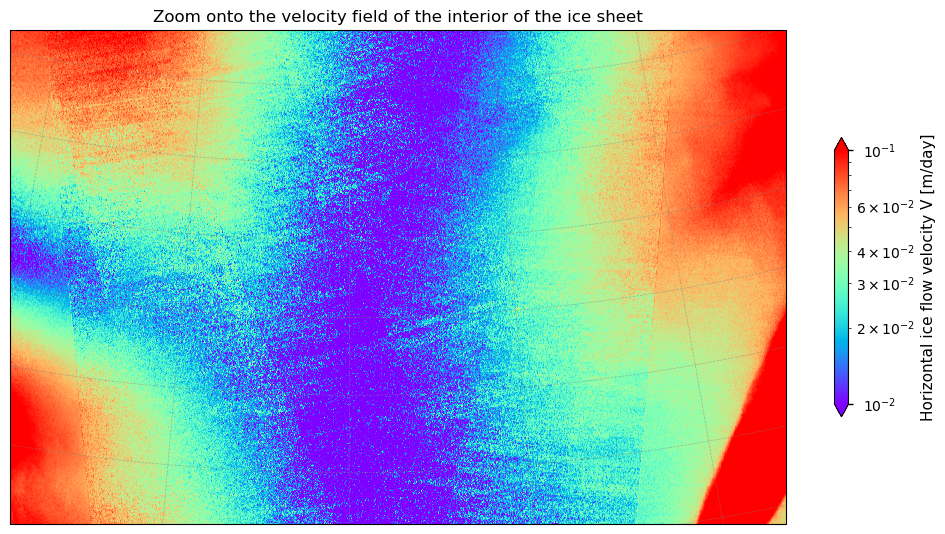

In [15]:
def plot_maps_single(da, suptitle=None, **kwargs):
    kwargs.setdefault("cmap", "rainbow")
    # Create subplots with Polar Stereographic projection
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70)})
    
    # Plot the data 
    im = da.plot.imshow(ax=ax, add_colorbar=False, **kwargs)
    
    # Set extent and plot features
    ax.set_extent([da.coords['x'].values.min(), da.coords['x'].values.max(), da.coords['y'].values.min(), da.coords['y'].values.max()], ccrs.Stereographic(central_longitude=-45, central_latitude=90, true_scale_latitude=70))
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    ax.coastlines()
    ax.gridlines(draw_labels=False,linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    ax.set_title(f'Zoom onto the velocity field of the interior of the ice sheet')
    fig.colorbar(im, ax=ax, extend='both', shrink=0.49, label=f"{da.attrs['long_name']} [{da.attrs['units']}]")

    plt.tight_layout()
    plt.show()

da = ds["land_ice_surface_velocity_magnitude"].isel(
    period=0, x=slice(1600, 3800), y=slice(2000, 3400)
)
_ = plot_maps_single(
    da,
    norm=matplotlib.colors.LogNorm(),
    vmin=1e-2,
    vmax=1e-1,
)

From the above plot, it becomes clear that low-velocity zones in the interior of the GrIS allow the noisy character of the acquired data to become clearly identifiable by visual inspection (i.e. ‘striping’). Striping can, for example, introduce biases, distort spatial patterns, reduce data quality, and complicate uncertainty estimates. This unrealistic striping in the interior of the ice sheet may therefore limit the use of the product for slowly moving ice and is hence important to consider when using the data. 

### ✅ Checking the vertical velocity component of the velocity data

Let us now briefly inspect the vertical velocity component of the dataset:

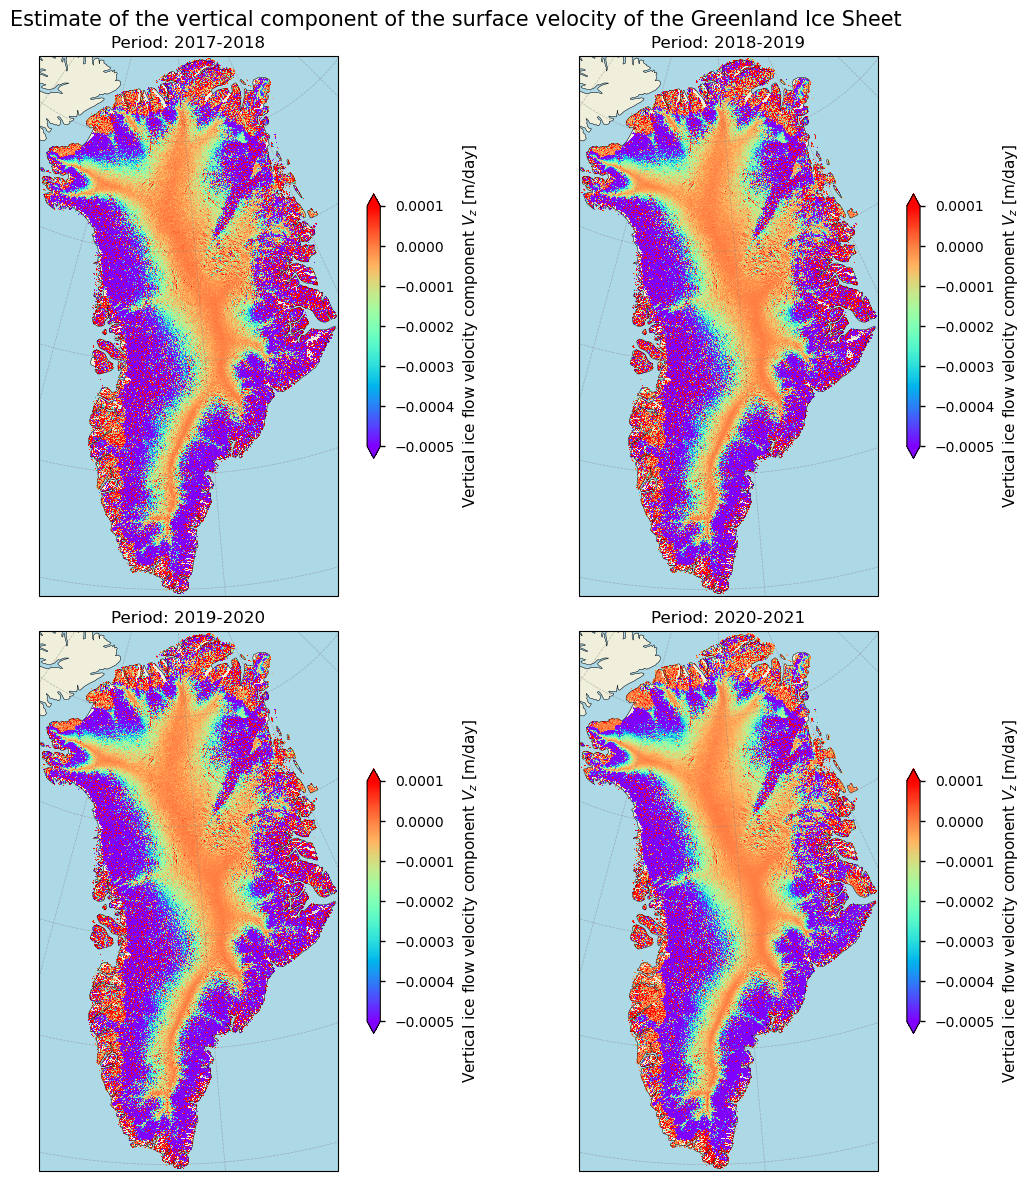

In [16]:
# Apply the function to the vertical velocity component
da = ds["land_ice_surface_vertical_velocity"]
da.attrs = {
    "long_name": r"Vertical ice flow velocity component $V_{z}$",
    "units": "m/day",
}

_ = plot_maps(
    da,
    vmin=-5e-4,
    vmax=1e-4,
    suptitle="Estimate of the vertical component of the surface velocity of the Greenland Ice Sheet",
)

From the figures above, it becomes clear that overall displacements are negative, which can be interpreted as downward displacements (i.e. downslope). It can be regarded as descending trajectories with respect to the vertical axis, i.e. from higher to lower elevations along the displacement vector, and can thus be generally linked to the surface slope in the direction of ice flow:

$V_z = \left( \frac{\partial h}{\partial x} V_x + \frac{\partial h}{\partial y} V_y \right) $

with $h$ the surface elevation.

It must be noted that including the vertical component as provided here does not represent the true 3D velocity. The vertical component in the dataset is calculated indirectly from the difference in surface elevation between the start and end positions of the horizontal displacement vector, derived from a DEM (i.e. it is the vertical component of the total displacement). Hence, it does not represent the upward or downward movement of the ice flow at that pixel (i.e. a true vertical velocity requires vertical displacement measurements at the same geographical location over time and not the elevation difference between two points (start and end positions of the displacement vector) over time). The vertical velocity component furthermore has no uncertainty. This data is thus not useful for most applications.

Let us now examine how all the above information plays out in the context of ice sheet modelling.

### 📌 Implications for use of horizontal ice flow velocity data in an ice sheet modelling framework

In the following section, we integrate all information derived above to assess the suitability of the ice sheet surface ice flow velocity dataset (with respect to the spatial/temporal characteristics of the error and the presence of 'striping') to use the velocity product in an ice sheet modelling framework for Greenland.

At the heart of an ice sheet model is the solution of the time-dependent continuity equation for ice thickness H:

$
\dfrac{\partial H}{\partial t} = -\nabla \cdot (\vec{\overline{v}}H) + M - S
$

where $H$ is the ice thickness, $\vec{\overline{v}}$ is the vertically averaged horizontal velocity vector, $M$ is the surface mass balance, and $S$ is the basal mass balance. A calibration procedure involves adjusting, for example, the basal sliding coefficient in Weertman’s basal sliding law in areas with basal temperatures at the pressure melting point and/or to adjust the rate factor in Glen’s flow law for interior regions frozen to bedrock (which impact $\vec{\overline{v}}$). This allows the modelled ice thickness to match the observed one (e.g. Le clec’h et al., 2019). The price to pay when calibrating the ice sheet model using ice thickness fields is that ice velocity after the process may deviate from the observations, depening on, amongst others, the assumptions of the physics and the numerical techniques used in the model.

In that regard, comparing modelled surface velocity fields to the observed ones provides a tool for the validation of an ice sheet model. For that purpose, the velocity product of the GrIS includes quantitative pixel-by-pixel error estimates, for which the uncertainty characterization is represented by two variables: the standard deviation (i.e. a precision error) and the valid pixel count (the number of observations used to estimate the eventual average pixel value). The inclusion of both variables enhances the product quality and serves as an important factor to consider when using the velocity product in an ice sheet modelling framework. In that regard, these variables can significantly impact the use of annually averaged velocity estimates for the validation of an ice sheet model:
- Lower standard deviations imply a higher precision of the annually averaged horizontal velocity data. These data points can be assimilated more confidently into the model, whereas areas with high standard deviations may imply lower data quality and may hence negatively affect the model performance. 
- A high count of valid measurements furthermore indicates more robust data as it reduces the uncertainty of the velocity estimates being fed into the model. Incorporating valid measurement count, for example into a data assimilation process, can therefore improve the model's performance.
- When tuning the model, it is advised to prioritize high-quality velocity data (i.e. with a low standard deviation and a high valid measurement count) to set the baseline parameters. This ensures that the model solution is based on the most reliable observations.

The spatial distribution of the standard deviation (which can be transformed to "relative" errors) and valid measurement count thus provides an indication of where the velocity data is most and least certain and reliable. If needed and/or desired, areas with low precision and/or fewer valid measurements may therefore require additional strategies or alternative data sources to improve the overall reliability of the model. For example, data validation schemes can, if desired, be adjusted to account for these relative errors and valid measurement counts, ensuring that higher quality data (i.e. lower standard deviation and high valid pixel counts) have a greater influence on the eventual solution. One strategy could be to weigh the data using weights based on both the velocity standard deviation and the valid measurement count. This approach involves combining the two variables to form a single weight $w_i$ for each data point $i$:

$w_i = \alpha \cdot (1-\varepsilon_{V,i}^{'}) + \beta \cdot N_{VP,i}^{'}
$

where:
- $\varepsilon_{V,i}^{'}$ are the normalized (relative) errors, 
- $N_{VP,i}^{'}$ are the normalized valid measurement counts, 
- weights $\alpha$ and $\beta$ for which $\alpha + \beta = 1$.

When using these weights in model validation, each data point's contribution to the model can be weighed accordingly. For instance, the weighted sum of squared residuals can be compared:

$
\sum_i w_i (y_i - f(x_i))^2
$

where:
- $y_i$ is the observed data (i.e. here the velocities from the dataset)
- $f(x_i)$ is the model prediction for the i$^{th}$ data point
- $w_i$ is the weight for the i$^{th}$ data point

Quantitative accuracy errors are, however, not included in the data itself. Next, striping in SAR-based ice velocity estimates can have several significant impacts on the  validation of ice sheet models. These impacts can affect the accuracy, reliability, and overall usefulness of the velocity data in modeling efforts, especially in interior low-flow zones that are frozen to the bedrock. Here are some of the key impacts:
- The presence of striping reduces the overall quality of the velocity data. This can lower the confidence in using these data for model validation, potentially necessitating the use of additional data sources or more sophisticated filtering techniques to mitigate the effects of striping. This may occur because the model can be tuned to match the artificial striping patterns rather than the actual ice flow, resulting in a less accurate model representation.
- Striping can distort the natural spatial patterns of ice flow. For instance, it can distort flow directions (which are crucial in the interior as these areas form the boundaries of major ice divides), leading to incorrect interpretations of ice dynamics and flow regimes in the model. Striping can therefore lead to the misinterpretation of physical processes driving ice flow. 

Mitigating these artefacts involves, for example, noise reduction methods such as spatial averaging or filtering, or merging velocity data of multiple tracks (Nagler et al., 2015). Another possible solution is replacing the distorted velocities in these areas by balance velocities (e.g. Bamber et al., 2000) or to only use velocities above a certain threshold (i.e. >5 m yr⁻¹) for the validation procedure.

Some typical problem areas for SAR-derived velocities can thus still be identified within the velocity fields when using the data into an ice sheet modelling framework. These are the ice sheet margins (e.g. due to complex terrain, rapidly changing surface conditions and fast flowing glaciers) and interior low-velocity zones (e.g. where ‘striping’ may occur and the detection of displacements is harder due to the lack of trackable surface patterns/features). In these areas, relatively low valid pixel counts, relatively high standard deviation values and/or artefacts prevail, such that the velocity estimates in these areas are of lower data quality. As such, by means of an error characterization, the valid measurement count maps (the total number of valid pixels used in the velocity estimate) and precision error maps (the standard deviation of the velocity magnitude) should be consulted before proper usage of the ice velocity data. 

## ℹ️ If you want to know more

### Key resources

- "Greenland ice sheet annual gridded velocity data from 2017 to present derived from satellite observations" on the CDS
- [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control` prepared by [BOpen](https://www.bopen.eu).

### References

- Bamber, J. L., Hardy, R. J., Huybrechts, P., and Joughin, I. (2000). A Comparison of Balance Velocities, Measured Velocities and Thermomechanically Modelled Velocities for the Greenland Ice Sheet, Annals of Glaciology, 30(2000), 211–16, http://dx.doi.org/10.3189/172756400781820589.

- GCOS (Global Climate Observing System) (2022). The 2022 GCOS ECVs Requirements (GCOS-245). World Meteorological Organization: Geneva, Switzerland. doi: https://library.wmo.int/idurl/4/58111.

- Howat, I., Negrete, A. and Smith, B. (2022). MEaSUREs Greenland Ice Mapping Project (GrIMP) Digital Elevation Model from GeoEye and WorldView Imagery, Version 2 [Data Set]. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. https://doi.org/10.5067/BHS4S5GAMFVY.

- Joughin, I., Howat, I., Smith, B., and Scambos, T. (2021). MEaSUREs Greenland Ice Velocity: Selected Glacier Site Velocity Maps from InSAR, Version 4. Boulder, Colorado USA. NASA National Snow and Ice Data Center Distributed Active Archive Center. https://doi.org/10.5067/GQZQY2M5507Z.

- Le clec'h, S., Quiquet, A., Charbit, S., Dumas, C., Kageyama, M., and Ritz, C. (2019). A rapidly converging initialisation method to simulate the present-day Greenland ice sheet using the GRISLI ice sheet model (version 1.3), Geosci. Model Dev., 12, 2481–2499, https://doi.org/10.5194/gmd-12-2481-2019.

- Lüttig, C., Neckel, N., and Humbert, A. (2017). A Combined Approach for Filtering Ice Surface Velocity Fields Derived from Remote Sensing Methods, Remote Sensing, 9(10). https://doi.org/10.3390/rs9101062.

- Nagler, T., Rott, H., Hetzenecker, M., Wuite, J. and Potin, P. (2015). The Sentinel-1 Mission: New Opportunities for Ice Sheet Observations. Remote Sensing. 7(7):9371-9389. https://doi.org/10.3390/rs70709371.

- Paul, F., Bolch, T., Briggs, K., Kääb, A., McMillan, M., McNabb, R., Nagler, T., Nuth, C., Rastner, P., Strozzi, T., and Wuite, J. (2017). Error sources and guidelines for quality assessment of glacier area, elevation change, and velocity products derived from satellite data in the Glaciers_cci project, Remote Sensing of Environment, 203, 256-275. https://doi.org/10.1016/j.rse.2017.08.038.